# Introdução


Esse notebook tem como objetivo destrinchar e entender os dados gerados pelo modelo de CV.

Para isso, vou criar um projeto lúdico-didático: Classificação de gestos do personagem Trafalgar Law de One Piece.

A ideia é:
 - Modelo ML/DL classifica com base nas coordenadas o gesto
 - É printado na tela o gesto, efeitos visuais
 - Para Shambles, adiciona feature que simula o anime/mangá
 - Aponta para um objeto e *"substitui"* ele

# Imports e Carregamento

In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import joblib

In [3]:
df = pd.read_csv("data/dados.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.856090,0.674298,-3.022110e-07,0.839493,0.581855,-0.018169,0.859508,0.485580,-0.028801,0.898331,...,1.002298,0.572986,-0.019905,0.988230,0.578070,-0.017888,0.973837,0.594119,-0.013395,ROOM
1,0.838977,0.706854,-2.933525e-09,0.823371,0.609591,-0.027122,0.838374,0.505100,-0.041976,0.874846,...,1.014632,0.591174,-0.025909,1.033039,0.582948,-0.027479,1.047320,0.581938,-0.027620,ROOM
2,0.836509,0.727829,-7.873873e-08,0.820247,0.624996,-0.028674,0.831491,0.520645,-0.046098,0.861160,...,1.014608,0.599331,-0.041163,1.033632,0.590237,-0.043629,1.048407,0.591191,-0.044481,ROOM
3,0.836316,0.744088,-1.699736e-08,0.816440,0.647112,-0.037947,0.823030,0.545415,-0.058569,0.848921,...,1.011463,0.616337,-0.042737,1.029494,0.606297,-0.047650,1.042286,0.607628,-0.050471,ROOM
4,0.832187,0.748703,-6.335283e-08,0.812959,0.648064,-0.036946,0.821562,0.542883,-0.056989,0.848220,...,1.014342,0.626086,-0.038952,1.033650,0.613906,-0.043899,1.048718,0.613043,-0.046294,ROOM


Vamos só entender as labels

Text(0.5, 1.0, 'Quantidade de cada label')

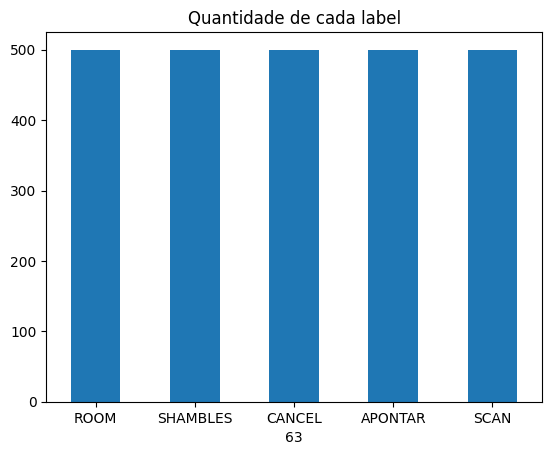

In [9]:
df["63"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)
plt.title("Quantidade de cada label")

Perfeito!!

Não temos muito o que ver por agora, vamos ao treino

# Modeling

O melhor Loss é: 0.002196742993728962 
O melhor Validation Score é: None


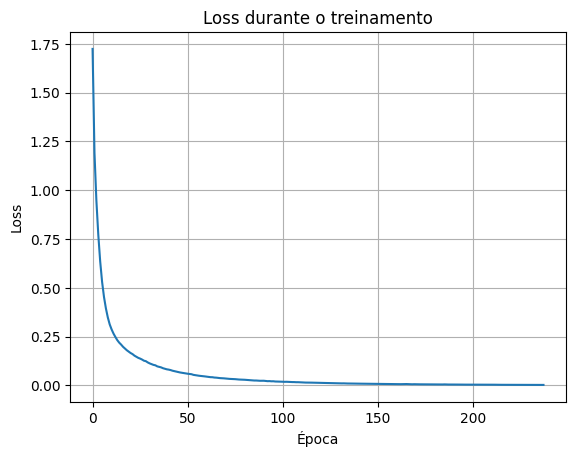

In [17]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size=.2, random_state=27, stratify=Y)

scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300)

model.fit(X_treino, y_treino)


print(f"O melhor Loss é: {model.best_loss_}",
      "\n======================",
      f"\nO melhor Validation Score é: {model.best_validation_score_}")

plt.plot(model.loss_curve_)
plt.title("Loss durante o treinamento")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(True)

Loss baixissimo, comçou em 1.75 e caiu para 0.0022, o modelo aprendeu bem.

Pelo gráfico é possível ver que ele atinge um bom valor em 150 épocas.

In [18]:
Y_pred = model.predict(X_teste)

print(classification_report(y_teste, Y_pred))
print(confusion_matrix(y_teste, Y_pred))

              precision    recall  f1-score   support

     APONTAR       0.99      1.00      1.00       100
      CANCEL       0.98      0.98      0.98       100
        ROOM       0.98      0.98      0.98       100
        SCAN       1.00      0.99      0.99       100
    SHAMBLES       0.99      0.99      0.99       100

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500

[[100   0   0   0   0]
 [  0  98   2   0   0]
 [  1   0  98   0   1]
 [  0   1   0  99   0]
 [  0   1   0   0  99]]


Os gestos são muito distintos e os 500 samples por classe + MLP simples resolveram perfeitamente. Modelo pronto pra produção!

# Salvando o modelo

In [20]:
joblib.dump(model, "models/MLP.pkl")
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']